In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Read data file
df = pd.read_csv('/content/drive/MyDrive/PTDLKD/Data/Silver_Data.csv', index_col='Date')

# PREPROCESSING DATA

In [3]:
# Flip the dataset
df = df.iloc[::-1]

# Reset the index
df = df.reset_index(drop=True)

# Drop unused columns
df.drop(['Vol.', 'Change %'], axis=1, inplace = True)

# Drop missing values
df = df.dropna()

In [4]:
df

,Price,Open,High,Low
0,16.520,16.430,16.535,16.280
1,16.575,16.530,16.700,16.465
2,16.405,16.555,16.600,16.330
3,16.687,16.475,16.715,16.420
4,16.546,16.690,16.740,16.500
...,...,...,...,...
1275,24.175,24.030,24.270,23.945
1276,23.783,24.115,24.115,23.710
1277,23.789,23.830,23.940,23.650
1278,23.523,23.840,23.840,23.380


In [6]:
# Format column Price to float
# List of column names to convert
columns = ['Price', 'Open', 'High', 'Low']

df

,Price,Open,High,Low
0,16.520,16.430,16.535,16.280
1,16.575,16.530,16.700,16.465
2,16.405,16.555,16.600,16.330
3,16.687,16.475,16.715,16.420
4,16.546,16.690,16.740,16.500
...,...,...,...,...
1275,24.175,24.030,24.270,23.945
1276,23.783,24.115,24.115,23.710
1277,23.789,23.830,23.940,23.650
1278,23.523,23.840,23.840,23.380


# SPLITTING DATA(7-2-1)

In [7]:
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

# FIND BEST VALUE FOR K

In [8]:
# Import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3837041401750832
RMSE value for k=  2 is: 0.3322501116911022
RMSE value for k=  3 is: 0.2991197908958139
RMSE value for k=  4 is: 0.30579117854026916
RMSE value for k=  5 is: 0.32575609213413054
RMSE value for k=  6 is: 0.3476938841989819
RMSE value for k=  7 is: 0.36754784185937606
RMSE value for k=  8 is: 0.3842708161175252
RMSE value for k=  9 is: 0.3966609031735813
RMSE value for k=  10 is: 0.41121726522454055
RMSE value for k=  11 is: 0.42018229718543215
RMSE value for k=  12 is: 0.4291061026870641
RMSE value for k=  13 is: 0.43018324882036424
RMSE value for k=  14 is: 0.43573118918013043
RMSE value for k=  15 is: 0.4406272862627846
RMSE value for k=  16 is: 0.4475041058058961
RMSE value for k=  17 is: 0.45455357331830065
RMSE value for k=  18 is: 0.4636666917457329
RMSE value for k=  19 is: 0.4729974533115882
RMSE value for k=  20 is: 0.48252891271048387


<Axes: >

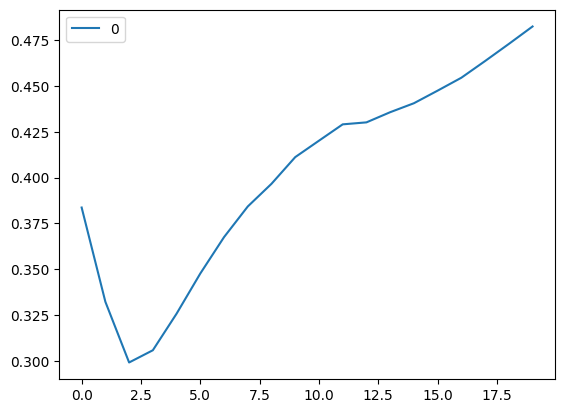

In [10]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [11]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 8)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [12]:
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [13]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[13.056375 13.056375 13.056375 13.056375 13.056375 13.056375 13.056375
 13.056375 13.056375 13.056375 13.056375 13.056375 13.056375 13.056375
 13.056375 13.056375 13.056375 13.056375 13.056375 13.056375 13.056375
 13.056375 13.056375 13.056375 13.056375 13.056375 13.056375 13.056375
 13.056375 13.056375]


In [14]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  0.3842708161175252
Testing MAE:  0.27609716796875006
Testing MAPE:  1.285238104900699
Validation RMSE:  0.36528469172120975
Validation MAE:  0.27340624999999996
Validation MAPE:  1.2148669094827214


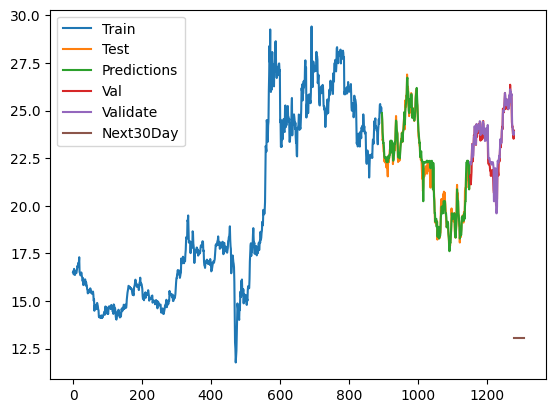

In [15]:
# Plot the model
plt.plot(train_data.index,train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [16]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.97


# SPLITTING DATA(6-3-1)

In [17]:
# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [18]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [19]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.43297386733112003
RMSE value for k=  2 is: 0.4381833131069872
RMSE value for k=  3 is: 0.4440726357106868
RMSE value for k=  4 is: 0.4418037461704096
RMSE value for k=  5 is: 0.455380390214232
RMSE value for k=  6 is: 0.4466547154385533
RMSE value for k=  7 is: 0.4578645954606668
RMSE value for k=  8 is: 0.4669641521671438
RMSE value for k=  9 is: 0.47943087261111306
RMSE value for k=  10 is: 0.506395582205338
RMSE value for k=  11 is: 0.5287296054043372
RMSE value for k=  12 is: 0.5395837228521757
RMSE value for k=  13 is: 0.5450896154217275
RMSE value for k=  14 is: 0.5594833115647249
RMSE value for k=  15 is: 0.5724325596902398
RMSE value for k=  16 is: 0.5915562087046735
RMSE value for k=  17 is: 0.60750792050569
RMSE value for k=  18 is: 0.6223276095673064
RMSE value for k=  19 is: 0.6289426241287701
RMSE value for k=  20 is: 0.6469555273447926


<Axes: >

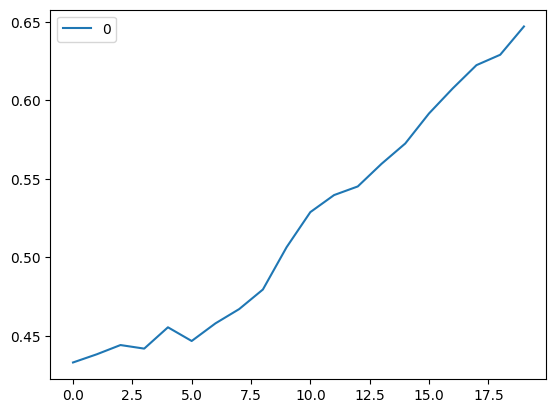

In [20]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [21]:
# create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 14)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=14)

In [22]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [23]:
#  Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[13.42285714 13.42285714 13.42285714 13.42285714 13.42285714 13.42285714
 13.42285714 13.42285714 13.42285714 13.42285714 13.42285714 13.42285714
 13.42285714 13.42285714 13.42285714 13.42285714 13.42285714 13.42285714
 13.42285714 13.42285714 13.42285714 13.42285714 13.42285714 13.42285714
 13.42285714 13.42285714 13.42285714 13.42285714 13.42285714 13.42285714]


In [24]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  0.5594833115647249
Testing MAE:  0.4072775297619051
Testing MAPE:  1.8383115966889958
Validation RMSE:  0.6129059323580118
Validation MAE:  0.44276004464285756
Validation MAPE:  1.9740035635862865


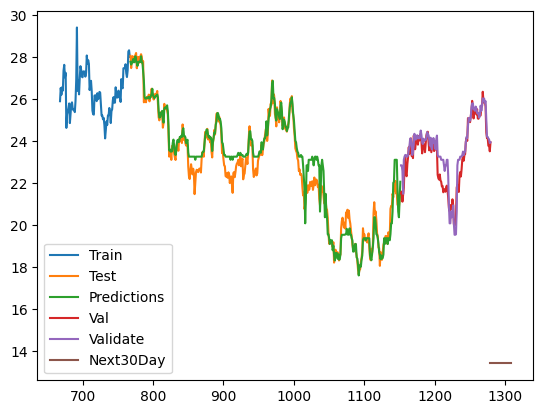

In [25]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [26]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.95


# SPLITTING DATA(5-3-2)

In [27]:
# Split the data into training, testing, and validation sets
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# FIND BEST VALUE FOR K

In [28]:
x_train = train_data.iloc[:, 1:5]
y_train = train_data.iloc[:, 0]
x_test = test_data.iloc[:, 1:5]
y_test = test_data.iloc[:, 0]
x_val = val_data.iloc[:, 1:5]
y_val = val_data.iloc[:, 0]

In [29]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.44146574635902774
RMSE value for k=  2 is: 0.4370075643831869
RMSE value for k=  3 is: 0.42766641971392366
RMSE value for k=  4 is: 0.43690741471157013
RMSE value for k=  5 is: 0.45611244056427575
RMSE value for k=  6 is: 0.4830850600824703
RMSE value for k=  7 is: 0.5084997413234551
RMSE value for k=  8 is: 0.5395886812245035
RMSE value for k=  9 is: 0.5607257273450043
RMSE value for k=  10 is: 0.5852577074593934
RMSE value for k=  11 is: 0.6099145274210946
RMSE value for k=  12 is: 0.6306367854718343
RMSE value for k=  13 is: 0.6450837256614746
RMSE value for k=  14 is: 0.6515171188966985
RMSE value for k=  15 is: 0.6668603198859758
RMSE value for k=  16 is: 0.6657624220014486
RMSE value for k=  17 is: 0.6634317555462879
RMSE value for k=  18 is: 0.6601844115824684
RMSE value for k=  19 is: 0.6488953797763871
RMSE value for k=  20 is: 0.6456332959444023


<Axes: >

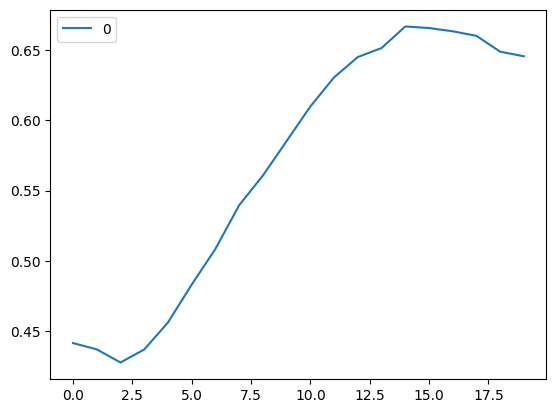

In [30]:
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

# K-NEAREST NEIGHBOR

In [31]:
# Create and fit a KNN model
model = KNeighborsRegressor(n_neighbors = 11)
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [32]:
import numpy as np
# Use the trained KNN model 'knn' to make predictions on the test set 'x_test' and assign the predictions to 'y_pred'
y_pred = model.predict(x_test)

# Use the trained KNN model 'knn' to make predictions on the test set 'x_val' and assign the predictions to 'y_pred_val'
y_pred_val =  model.predict(x_val)

In [33]:
# Create index for next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

data = {'Open': [0] * 30,
        'High': [0] * 30,
        'Low': [0] * 30}

x_next_30_days = pd.DataFrame(data)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[13.23454545 13.23454545 13.23454545 13.23454545 13.23454545 13.23454545
 13.23454545 13.23454545 13.23454545 13.23454545 13.23454545 13.23454545
 13.23454545 13.23454545 13.23454545 13.23454545 13.23454545 13.23454545
 13.23454545 13.23454545 13.23454545 13.23454545 13.23454545 13.23454545
 13.23454545 13.23454545 13.23454545 13.23454545 13.23454545 13.23454545]


In [34]:
# Calculate accuracy for each model
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(y_test, y_pred)
val_mse = mean_squared_error(y_val, y_pred_val)
test_rmse = np.sqrt(test_mse)
val_rmse = np.sqrt(val_mse)

from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test, y_pred)
val_mae = mean_absolute_error(y_val, y_pred_val)

test_ape = np.abs((y_test - y_pred) / y_test)
val_ape = np.abs((y_val - y_pred_val) / y_val)
test_mape = np.mean(test_ape) * 100
val_mape = np.mean(val_ape) * 100

print('Testing RMSE: ', test_rmse)
print('Testing MAE: ', test_mae)
print('Testing MAPE: ', test_mape)
print('Validation RMSE: ', val_rmse)
print('Validation MAE: ', val_mae)
print('Validation MAPE: ', val_mape)

Testing RMSE:  0.6099145274210946
Testing MAE:  0.49561979166666664
Testing MAPE:  2.0489632569165157
Validation RMSE:  0.655711385888984
Validation MAE:  0.4981715198863635
Validation MAPE:  2.287063391993854


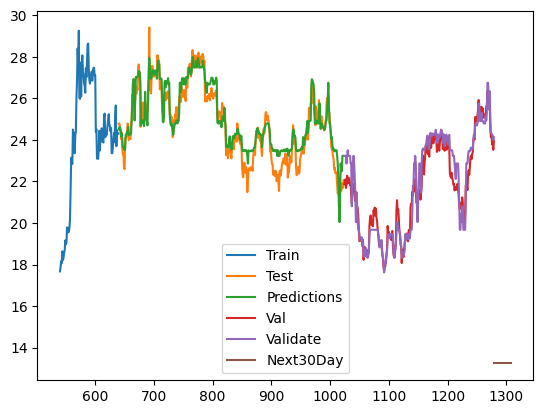

In [35]:
# Plot the model
plt.plot(train_data.index[train_size-100:],train_data['Price'][train_size-100:])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, val_data['Price'])
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val','Validate','Next30Day'])
plt.show()

In [36]:
# Print accuracy score for the prediction
print('Accuracy: {:.2f}'.format(model.score(x_test, y_test)))

Accuracy: 0.88


# EVALUATING MODEL

---